In [2]:
!pip install -q scikit-learn seaborn

You should consider upgrading via the 'c:\hcgalvan\repositorios\hcgalvan_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
# importamos las librerias necesarias
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

np.random.seed(42)

In [ ]:
# Solo cuando estás en Google Colab
DATA_PATH = "https://github.com/brainhack-school2023/hcgalvan_project/raw/main/data/"

In [ ]:
if 'google.colab' in sys.modules:
  def load_datasets_t1(datasets_path=DATA_PATH):
    csv_path = os.path.join(datasets_path, "dataset_final.csv")
    return pd.read_csv(csv_path, encoding= 'unicode_escape')


  def load_datasets_t2(datasets_path=DATA_PATH):
      csv_path = os.path.join(datasets_path, "Year_2010-2011_train.csv")
      return pd.read_csv(csv_path, encoding= 'unicode_escape')

  data_train = load_datasets_t1()
  data_test = load_datasets_t2()

In [2]:
DATA_PATH = "../data"
def load_pat_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final_patol.csv")
    return pd.read_csv(csv_path)

def load_cnt_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final_control.csv")
    return pd.read_csv(csv_path)


In [3]:
data_pre_pat = load_pat_data()
data_pre_cnt = load_cnt_data()


In [4]:
frames = [data_pre_pat, data_pre_cnt]
results = pd.concat(frames)
dataset_gral = results.copy()

In [6]:
dataset_gral.shape

(65, 291)

In [7]:
dataset_gral.to_csv('../data/dataset_gral.csv', index=False)

In [ ]:
data_pre.isnull().any(axis=1)


In [ ]:
data_pre.isnull().any(axis=0)  # axis=0 para columnas, axis=1 para filas

In [51]:
data_pre.isnull().sum()

cod                                 0
afsl_ad                             0
afsl_area_of_end_region_1           0
afsl_area_of_end_region_2           0
afsl_branch_volume                  0
                                   ..
ufsr_total_area_of_end_regions      1
ufsr_total_radius_of_end_regions    1
ufsr_total_surface_area             1
ufsr_trunk_volume                   1
ufsr_volume                         1
Length: 291, dtype: int64

You should consider upgrading via the 'c:\hcgalvan\repositorios\hcgalvan_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


<Axes: >

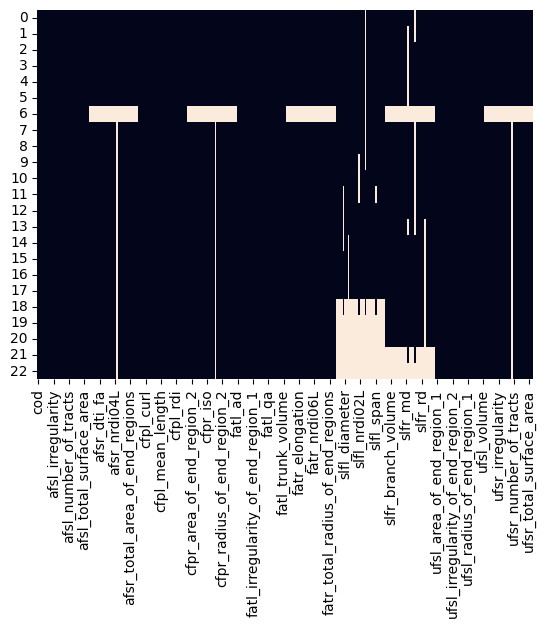

In [56]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(data_pre.isnull(), cbar=False)

In [ ]:
# Rellenamos hacia atrás
df['D'].bfill(inplace = True)

# Eliminamos los NaN
df.dropna(inplace = True)

In [42]:
data_pre.shape

(23, 291)

In [43]:
data_pre.isnull().sum()

cod                                 0
afsl_ad                             0
afsl_area_of_end_region_1           0
afsl_area_of_end_region_2           0
afsl_branch_volume                  0
                                   ..
ufsr_total_area_of_end_regions      1
ufsr_total_radius_of_end_regions    1
ufsr_total_surface_area             1
ufsr_trunk_volume                   1
ufsr_volume                         1
Length: 291, dtype: int64

In [44]:
data_pre.dropna().inplace=True

In [46]:
data_pre.isnull().sum()

cod                                 0
afsl_ad                             0
afsl_area_of_end_region_1           0
afsl_area_of_end_region_2           0
afsl_branch_volume                  0
                                   ..
ufsr_total_area_of_end_regions      1
ufsr_total_radius_of_end_regions    1
ufsr_total_surface_area             1
ufsr_trunk_volume                   1
ufsr_volume                         1
Length: 291, dtype: int64

In [ ]:
# separamos los datos en train y test
train_df, test_df = train_test_split(data_pre, test_size=0.2, random_state=42)

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=445543)
for train_index, test_index in split.split(data_pre, data_pre["income_cat"]):
    train_df = data_pre.loc[train_index]
    test_df = data_pre.loc[test_index]